# Lead Score - Case Study


## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives



- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
- To adjust to if the company's requirement changes in the future so you will need to handle these as well.

### Importing the necessary libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',50)

### Step : 1 - Understanding and Cleaning the Data

In [2]:
df = pd.read_csv("Leads.csv")

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


__There are 9240 rows and 37 columns in the data set. Out of which 30 columns are of 'Object' and 7 columns are of 'Numeric' datatype__

In [7]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## 1.2 Cleaning the Dataframe

In [8]:
df = df.replace('Select', np.nan)  # Replacing the 'select' with Nan (Since it means no option selected)

In [9]:
df.nunique().sort_values(ascending=True)              # Checking for the least number of unique values in the dataframe

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [10]:
# Dropping least unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1) 

In [11]:
round(df1.isnull().sum()/len(df)*100,2)   # Percentage of the null values

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# Dropping the columns having more than 35% of null values
Leads = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)

In [13]:
round(Leads.isnull().sum()/len(Leads)*100,2)  #Checking for the null values percentage again

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

__There are four columns with high rate of null values, but these columns seems to be important for the analysis. So we decide to impute 'Not Available' instead of 'NaN'.__

In [14]:
Leads['Country'] = Leads['Country'].fillna("Not Available")
Leads['Specialization'] = Leads['Specialization'].fillna("Not Available")
Leads['What is your current occupation'] = Leads['What is your current occupation'].fillna('Not Available')
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].fillna('Not Available')

In [15]:
Leads.Country.value_counts()   #Checking the value counts in 'Country' column

India                   6492
Not Available           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [16]:
# defining a function to convert the  country other than india as 'Outside India'  due to least number of datapoints
def out_ind(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Available":
        category = "Not Available"
    else:
        category = "Outside India"
    return category
        
Leads['Country'] = Leads.apply(lambda x: out_ind(x['Country']), axis=1)

In [17]:
Leads['Country'].value_counts()

India            6492
Not Available    2461
Outside India     287
Name: Country, dtype: int64

In [18]:
round(Leads.isnull().sum()/len(Leads)*100,2)                                                  #Rechecking for null values in dataframe

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
Leads = Leads[Leads.isnull().sum(axis=1) < 1]                      #Dropping the rows having null values

In [20]:
round(Leads.isnull().sum()/len(Leads)*100,2)                                   # Rechecking for the null values

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [21]:
# Getting all the categorical values in the dataframe for each column
for col in Leads:
    print(Leads[col].astype('category').value_counts())
    print('*'*50)

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
**************************************************
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
**************************************************
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                  

In [22]:
Leads = Leads.drop('Prospect ID', axis = 1)                             # Dropping the "Prospect ID" as their are unique value for every value
Leads.shape

(9074, 21)

## Step : 2  Exploratory Data Analysis

### -- Univariate Analysis for Categorical Variables

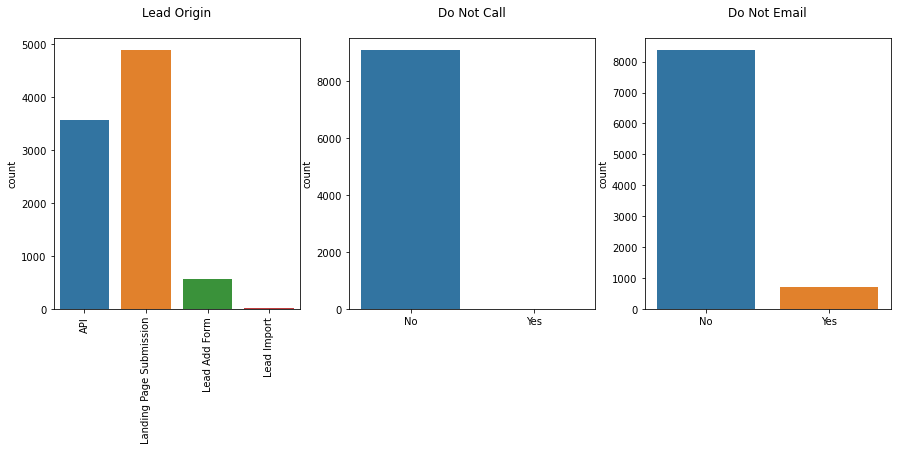

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(Leads['Lead Origin']).tick_params(axis='x', rotation=90)
plt.title('Lead Origin\n')
plt.xlabel("")

plt.subplot(1,3,2)
sns.countplot(Leads['Do Not Call'])
plt.title('Do Not Call\n')
plt.xlabel("")

plt.subplot(1,3,3)
sns.countplot(Leads['Do Not Email'])
plt.title('Do Not Email\n')
plt.xlabel("")

plt.show()

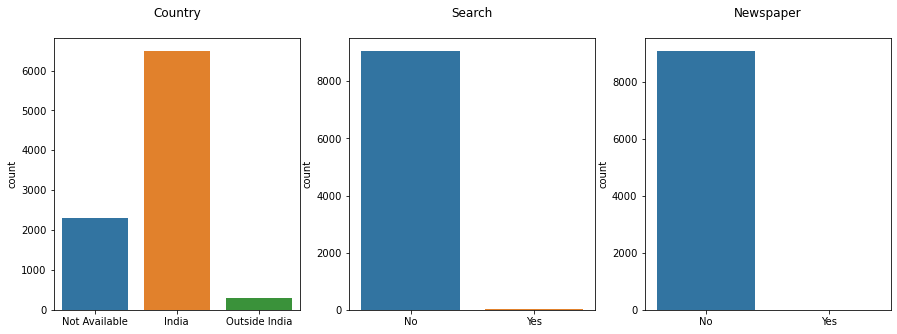

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(Leads['Country'])
plt.title('Country\n')
plt.xlabel("")

plt.subplot(1,3,2)
sns.countplot(Leads['Search'])
plt.title('Search\n')
plt.xlabel("")

plt.subplot(1,3,3)
sns.countplot(Leads['Newspaper'])
plt.title('Newspaper\n')
plt.xlabel("")

plt.show()

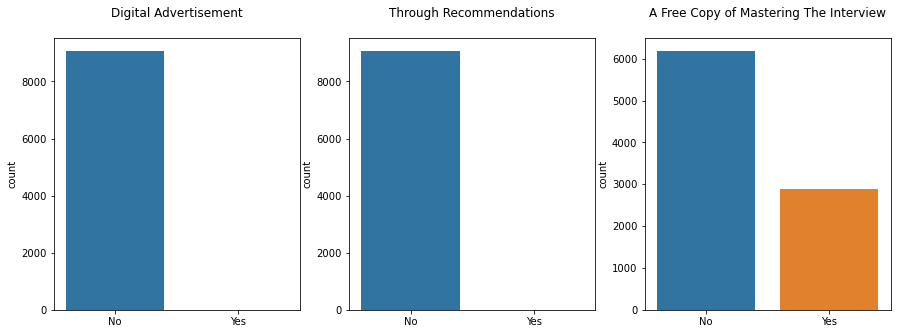

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(Leads['Digital Advertisement'])
plt.title('Digital Advertisement\n')
plt.xlabel("")

plt.subplot(1,3,2)
sns.countplot(Leads['Through Recommendations'])
plt.title('Through Recommendations\n')
plt.xlabel("")

plt.subplot(1,3,3)
sns.countplot(Leads['A free copy of Mastering The Interview'])
plt.title('A Free Copy of Mastering The Interview\n')
plt.xlabel("")

plt.show()

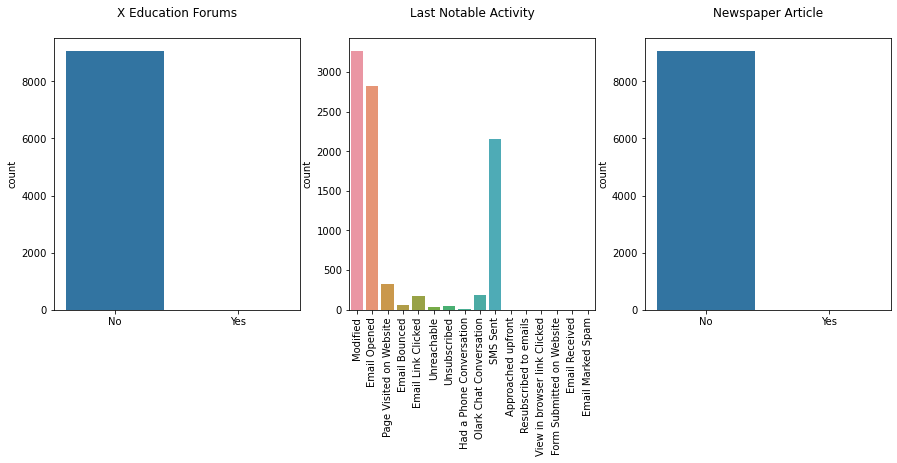

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(Leads['X Education Forums'])
plt.title('X Education Forums\n')
plt.xlabel("")

plt.subplot(1,3,2)
sns.countplot(Leads['Last Notable Activity']).tick_params(axis='x', rotation=90)
plt.title('Last Notable Activity\n')
plt.xlabel("")

plt.subplot(1,3,3)
sns.countplot(Leads['Newspaper Article'])
plt.title('Newspaper Article\n')
plt.xlabel("")

plt.show()

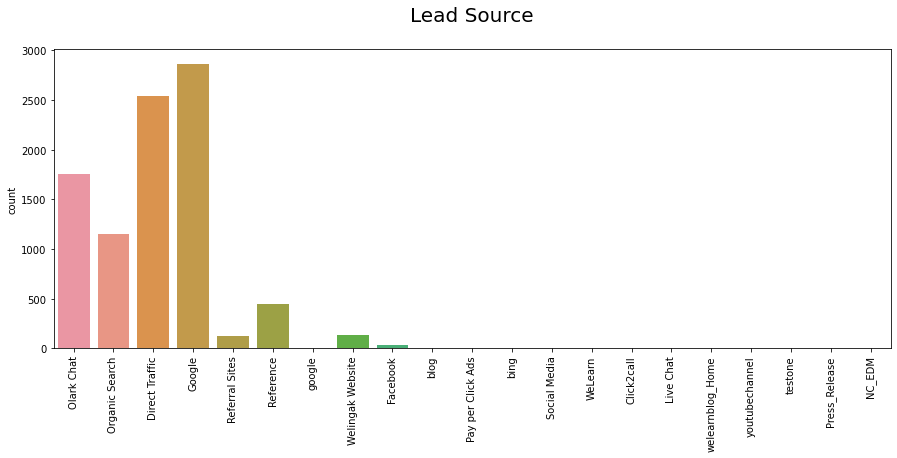

In [27]:
plt.figure(figsize=(15,5.5))
sns.countplot(Leads["Lead Source"]).tick_params(axis='x', rotation=90)
plt.title("Lead Source\n", fontdict={'fontsize':20})
plt.xlabel("")
plt.show()

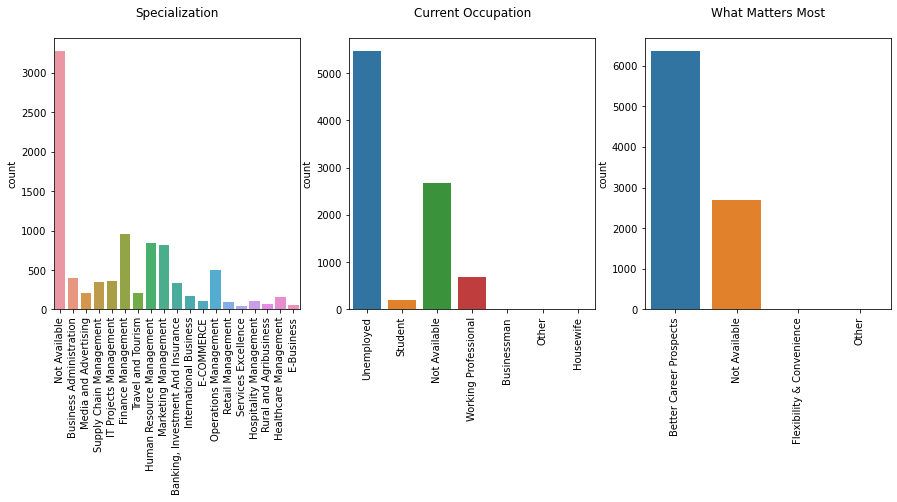

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(Leads['Specialization']).tick_params(axis='x', rotation=90)
plt.title('Specialization\n')
plt.xlabel("")

plt.subplot(1,3,2)
sns.countplot(Leads['What is your current occupation']).tick_params(axis='x', rotation=90)
plt.title('Current Occupation\n')
plt.xlabel("")

plt.subplot(1,3,3)
sns.countplot(Leads['What matters most to you in choosing a course']).tick_params(axis='x', rotation=90)
plt.title('What Matters Most\n')
plt.xlabel("")

plt.show()

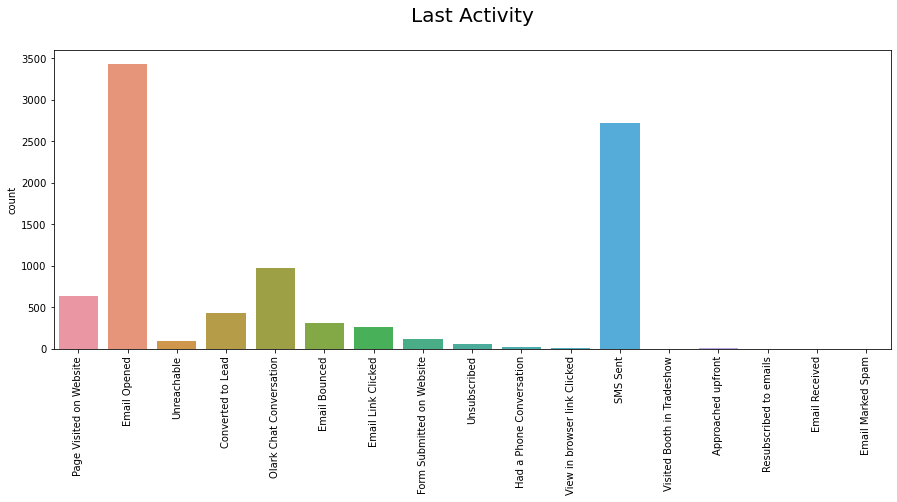

In [29]:
plt.figure(figsize=(15,5.5))
sns.countplot(Leads["Last Activity"]).tick_params(axis='x', rotation=90)
plt.title("Last Activity\n", fontdict={'fontsize':20})
plt.xlabel("")
plt.show()

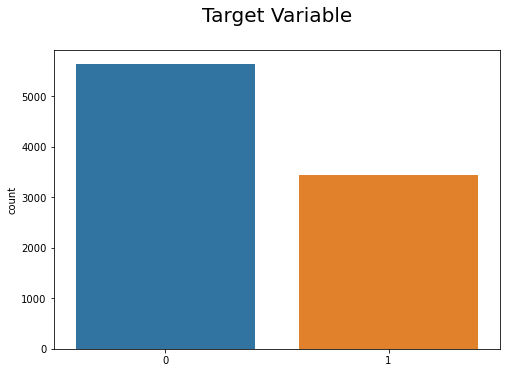

In [30]:
plt.figure(figsize=(8,5.5))
sns.countplot(Leads["Converted"])
plt.title("Target Variable\n", fontdict={'fontsize':20})
plt.xlabel("")
plt.show()

In [31]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

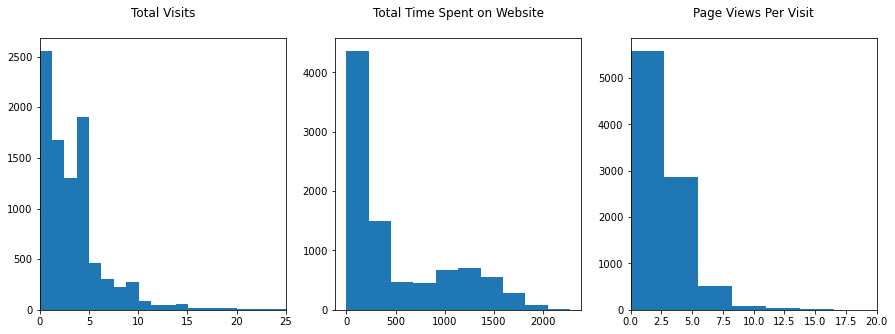

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(Leads['TotalVisits'], bins=200)
plt.title('Total Visits\n')
plt.xlabel("")
plt.xlim(0,25)

plt.subplot(1,3,2)
plt.hist(Leads['Total Time Spent on Website'], bins=10)
plt.title('Total Time Spent on Website\n')
plt.xlabel("")

plt.subplot(1,3,3)
plt.hist(Leads['Page Views Per Visit'], bins=20)
plt.title('Page Views Per Visit\n')
plt.xlabel("")
plt.xlim(0,20)

plt.show()

### - Categorical Vs Dependet Variable

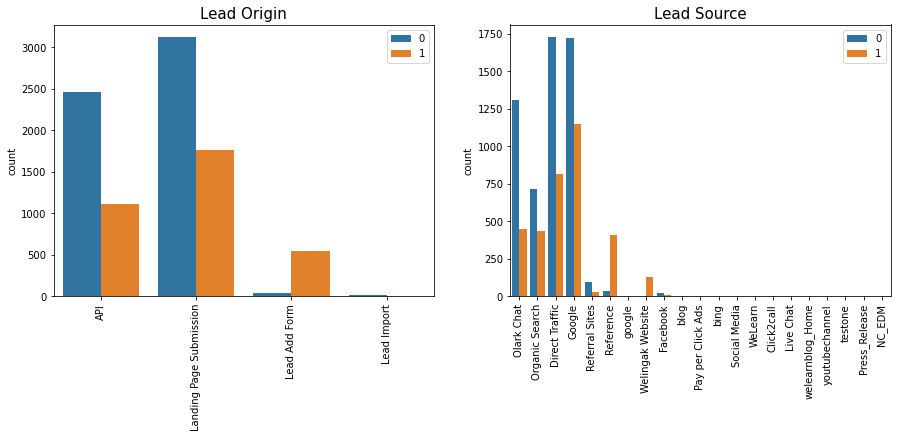

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

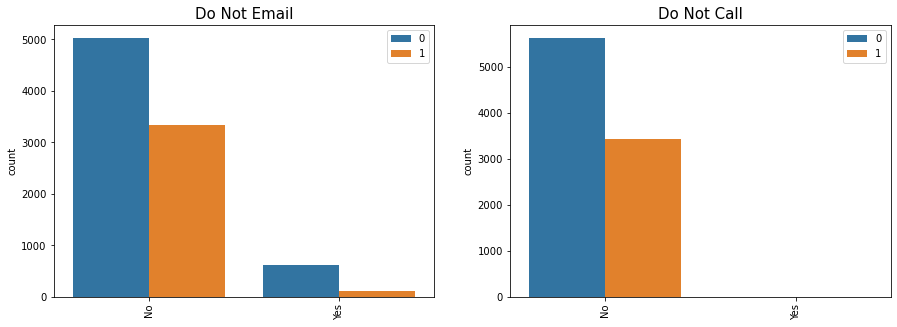

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

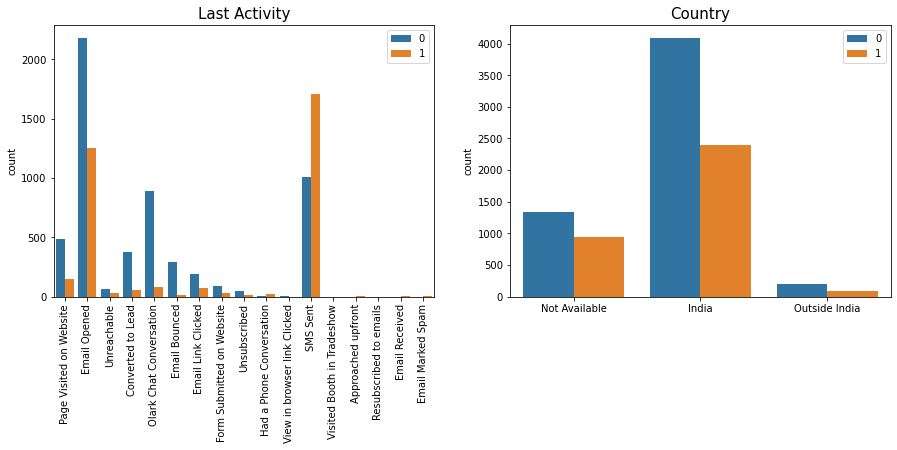

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Last Activity', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Leads)
plt.title('Country', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

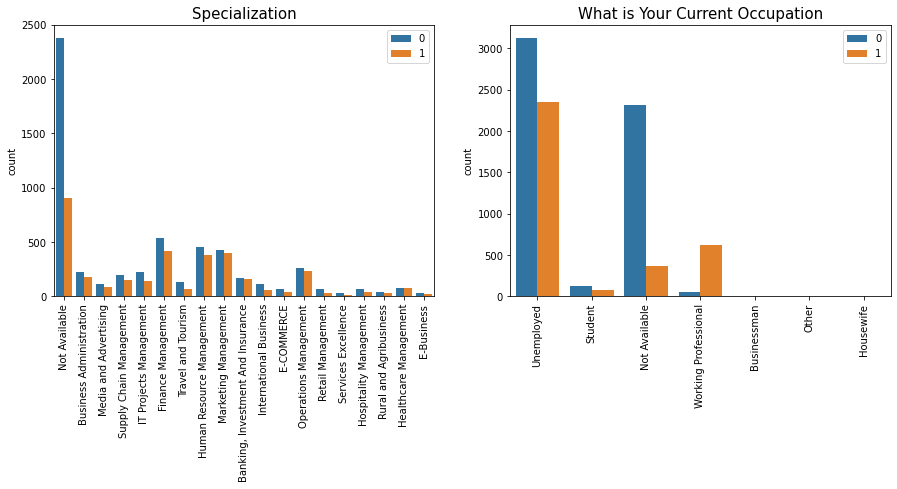

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Specialization', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('What is Your Current Occupation', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

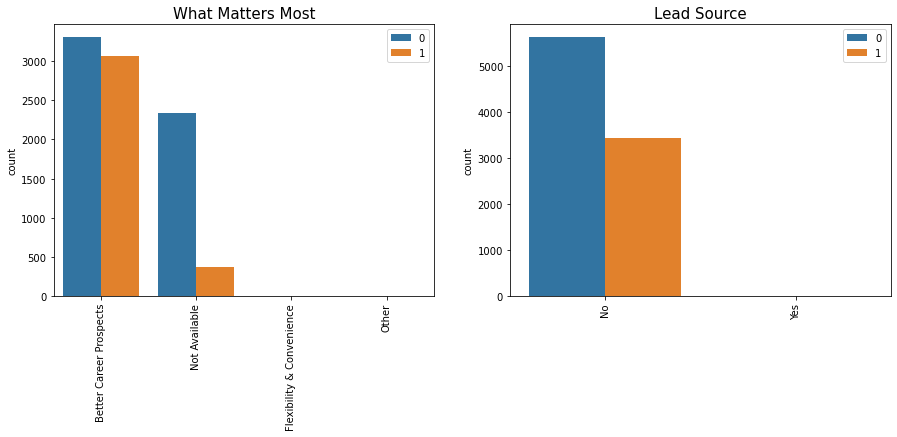

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('What Matters Most', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Lead Source', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

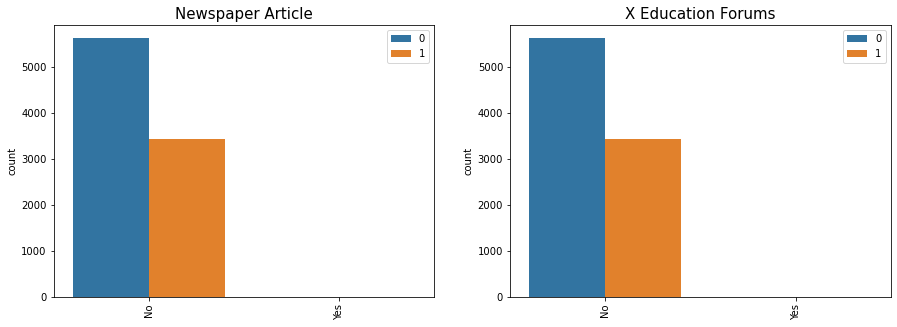

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

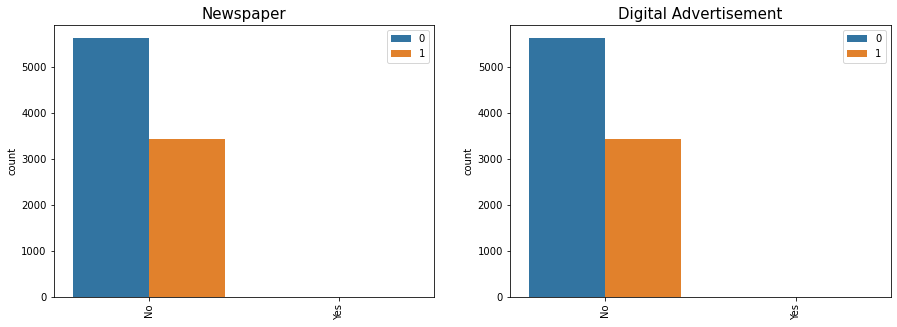

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Newspaper', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

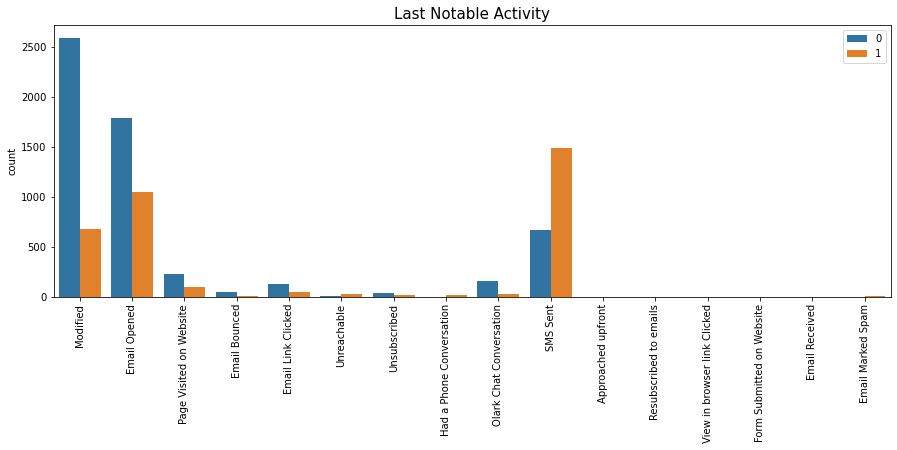

In [40]:
plt.figure(figsize=(15,5))

sns.countplot(x='Last Notable Activity', hue='Converted', data= Leads).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity', fontdict = {'fontsize':15})
plt.legend(loc='upper right')
plt.xlabel("")

plt.show()

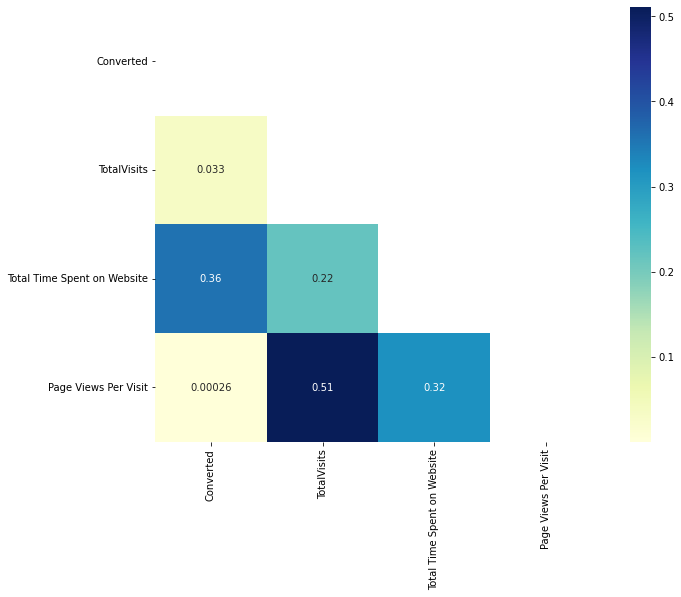

In [41]:
# Checking for the correlation matrix
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(Leads.corr()))
sns.heatmap(Leads.corr() , cmap="YlGnBu", annot=True, mask=mask)
plt.show()

- __From the above EDA it is considerable that there are many elements that have very little data and so will be of less relevance to our analysis__

In [42]:
ncol = Leads[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]
ncol.describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


- __There are no major outliers__

### Step:3 - Dummy Variables

In [43]:
# Extracting Categorical Columns from the dataset
catcol = list(Leads.loc[:, Leads.dtypes == 'object'].columns)
catcol

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [44]:
# Creating Dummy variables for the categorical variables
dumvar = pd.get_dummies(Leads[catcol], drop_first=True)
dumvar.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,...,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [45]:
# Merging the Dummy variables
Leads = pd.concat([Leads, dumvar], axis=1)
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
#Dropping the Categorcial Columns
Leads = Leads.drop(catcol, axis=1)
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,...,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [47]:
Leads.shape

(9074, 96)

### Step:4 - Model Building

In [48]:
from sklearn.model_selection import train_test_split

#### Train and Test Split

In [49]:
X= Leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,...,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [51]:
#Split the dataset into 70 and 30 for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

#### Scaling the data using MinMaxScaler

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
# Scaling the numeric features

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                                                                                                                            'Page Views Per Visit', 
                                                                                                                                                                                                            'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,...,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,...,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
TotalVisits,1.000000,0.286440,0.620686,0.358407,-0.209241,-0.046067,0.111200,-0.044650,0.142864,-0.015531,NaN,-0.384267,0.246377,NaN,0.025633,-0.182150,0.058651,-0.004097,-0.004514,-0.100453,-0.004097,0.001954,0.011996,0.005188,-0.004514,...,-0.010981,-0.059180,-0.007747,0.068450,0.050789,0.053697,0.021358,0.040733,0.046326,0.253113,-0.014248,-0.023853,0.002764,0.053210,0.008422,-0.004514,0.030698,-0.128404,-0.051087,0.237402,-0.010981,0.005142,0.007556,0.004752,NaN
Total Time Spent on Website,0.286440,1.000000,0.331996,0.293144,-0.194757,-0.051721,0.149216,-0.051053,0.213485,-0.015682,NaN,-0.376744,0.097793,NaN,0.010334,-0.169988,0.009560,0.002190,0.015967,-0.093312,-0.008475,0.004382,0.008377,-0.004141,-0.002679,...,-0.011088,-0.147418,-0.001079,-0.002166,0.013711,0.007512,0.030316,0.016140,0.022916,0.178875,-0.012725,-0.040649,0.014131,0.012737,0.006301,-0.004530,0.027022,-0.122961,-0.059617,0.026651,-0.011088,0.143350,0.013139,-0.007085,NaN
Page Views Per Visit,0.620686,0.331996,1.000000,0.502309,-0.278812,-0.056110,0.130145,-0.052863,0.219747,-0.019947,NaN,-0.516540,0.316733,NaN,0.055678,-0.242954,0.069604,0.001060,-0.002221,-0.129067,-0.003141,0.009661,0.023784,0.000750,-0.002221,...,-0.014103,-0.081073,-0.008162,0.043735,0.028369,0.000750,0.005681,0.025313,0.028521,0.285985,-0.015476,-0.036761,-0.008729,0.074465,0.003720,-0.002221,0.023411,-0.108913,-0.091529,0.020467,-0.014103,0.068325,0.014361,0.027541,NaN
Lead Origin_Landing Page Submission,0.358407,0.293144,0.502309,1.000000,-0.285485,-0.064071,0.529894,-0.060256,0.092294,-0.019288,NaN,-0.534472,0.037145,NaN,0.016332,-0.248257,-0.083317,-0.001478,0.011548,-0.130293,-0.019288,0.011548,0.023101,0.011548,0.011548,...,-0.013637,-0.098108,0.011548,0.023770,0.016332,0.011548,0.011548,0.020004,0.025829,0.565226,0.011657,-0.026744,-0.001478,0.067745,0.011548,0.011548,0.005952,-0.086395,-0.121374,0.056311,-0.013637,0.042096,-0.007548,0.015544,NaN
Lead Origin_Lead Add Form,-0.209241,-0.194757,-0.278812,-0.285485,1.000000,-0.015488,-0.164125,-0.015838,-0.176874,0.067562,NaN,-0.125965,-0.101221,NaN,-0.004663,0.869598,-0.030230,-0.004663,-0.003297,0.456391,-0.004663,-0.003297,-0.006595,-0.003297,-0.003297,...,-0.003297,-0.169448,-0.003297,-0.009330,-0.004663,-0.003297,-0.003297,-0.005711,-0.007374,-0.169135,-0.012448,0.003417,0.031450,-0.027661,-0.003297,-0.003297,-0.009330,-0.060381,-0.028372,-0.016064,-0.003297,0.115590,0.018352,-0.019273,NaN
...,...,...,...,...

#### Use of RFE

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lg = LogisticRegression()
rfe = RFE(lg, 15)                                          # Selecting 15 Features as output

In [57]:
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Source_Direct Traffic', False, 30),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_NC_EDM', False, 79),
 ('Lead Source_Olark Chat', False, 45),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Pay per Click Ads', False, 80),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', False, 60),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 40),
 ('Lead Source_blog', False, 41),
 ('Lead Source_google', False, 47),
 ('Lead Source_testone', False, 42),
 ('Lead Source_welearnblog_Home', False, 53),

In [59]:
rfe_col = X_train.columns[rfe.support_]                    #Adding selected feature to the variable rfe_col

In [60]:
X_train = X_train[rfe_col]        #Keeping only the features selected after the Recursion Feature Elimination Process

In [61]:
import statsmodels.api as sm                                      #Importing the Statsmodel

### Building the First Model

In [62]:
X_train_sm = sm.add_constant(X_train)
model1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.5
Date:                Sat, 25 Feb 2023   Deviance:                       5179.1
Time:                        17:24:02   Pearson chi2:                 6.54e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.2934      0.140     -9.253      0.000      -1.567      -1.019
TotalVisits                                                     5.8818      1.509      3.898      0.000       2.924       8.839
Total Time Spent on Website                                     4.6336      0.170     27.307      0.000       4.301       4.966
Lead Origin_Landing Page Submission                            -1.1271      0.126     -8.958      0.000      -1.374      -0.880
Lead Origin_Lead Add Form                                       1.7310      0.234      7.412      0.000       1.273       2.189
Lead Source_Welingak Website                                    3.1158      1.035      3.010      0.003       1.087       5.145
Do Not Email_Yes                                               -1.4047      0.174     -8.094      0.000      -1.745      -1.065
Last Activity_Olark Chat Conversation                          -1.3840      0.170     -8.122      0.000      -1.718      -1.050
Last Activity_SMS Sent                                          1.3086      0.075     17.497      0.000       1.162       1.455
Country_Not Available                                           1.4802      0.129     11.495      0.000       1.228       1.733
Specialization_Not Available                                   -1.0558      0.127     -8.285      0.000      -1.306      -0.806
What is your current occupation_Housewife                      24.3063   3.06e+04      0.001      0.999   -5.99e+04    5.99e+04
What is your current occupation_Working Professional            2.4228      0.200     12.125      0.000       2.031       2.814
What matters most to you in choosing a course_Not Available    -1.1081      0.087    -12.713      0.000      -1.279      -0.937
Last Notable Activity_Had a Phone Conversation                 24.0405   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Last Notable Activity_Unreachable                               1.6205      0.617      2.626      0.009       0.411       2.830
===============================================================================================================================
"""

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor         #Importing the 'variance_inflation_factor'

In [64]:
#Creating the VIF for all the features

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_Not Available,2.77
2,Lead Origin_Landing Page Submission,2.74
9,Specialization_Not Available,2.68
1,Total Time Spent on Website,2.14
0,TotalVisits,2.12
3,Lead Origin_Lead Add Form,1.89
12,What matters most to you in choosing a course_...,1.60
7,Last Activity_SMS Sent,1.56
6,Last Activity_Olark Chat Conversation,1.44
4,Lead Source_Welingak Website,1.34


VIF values for all the features is less than 5, but the p-value for the feature __'What is your current occupation_Housewife'__ is on higer side i.e. __0.999__. So Removing the feature

In [65]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

#### Building the Second Model

In [66]:
X_train_sm = sm.add_constant(X_train)
model2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.6
Date:                Sat, 25 Feb 2023   Deviance:                       5189.2
Time:                        17:24:02   Pearson chi2:                 6.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.2803      0.139     -9.184      0.000      -1.553      -1.007
TotalVisits                                                     5.7888      1.499      3.861      0.000       2.850       8.728
Total Time Spent on Website                                     4.6252      0.169     27.297      0.000       4.293       4.957
Lead Origin_Landing Page Submission                            -1.1266      0.126     -8.967      0.000      -1.373      -0.880
Lead Origin_Lead Add Form                                       1.7469      0.233      7.488      0.000       1.290       2.204
Lead Source_Welingak Website                                    3.1018      1.035      2.996      0.003       1.073       5.131
Do Not Email_Yes                                               -1.4080      0.173     -8.117      0.000      -1.748      -1.068
Last Activity_Olark Chat Conversation                          -1.3856      0.170     -8.132      0.000      -1.720      -1.052
Last Activity_SMS Sent                                          1.3027      0.075     17.434      0.000       1.156       1.449
Country_Not Available                                           1.4710      0.128     11.454      0.000       1.219       1.723
Specialization_Not Available                                   -1.0591      0.127     -8.316      0.000      -1.309      -0.810
What is your current occupation_Working Professional            2.4164      0.200     12.097      0.000       2.025       2.808
What matters most to you in choosing a course_Not Available    -1.1105      0.087    -12.750      0.000      -1.281      -0.940
Last Notable Activity_Had a Phone Conversation                 23.0318   1.29e+04      0.002      0.999   -2.52e+04    2.52e+04
Last Notable Activity_Unreachable                               1.6143      0.617      2.616      0.009       0.405       2.824
===============================================================================================================================
"""

In [67]:
#Creating the VIF for all the features

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_Not Available,2.77
2,Lead Origin_Landing Page Submission,2.74
9,Specialization_Not Available,2.68
1,Total Time Spent on Website,2.14
0,TotalVisits,2.12
3,Lead Origin_Lead Add Form,1.89
11,What matters most to you in choosing a course_...,1.60
7,Last Activity_SMS Sent,1.56
6,Last Activity_Olark Chat Conversation,1.44
4,Lead Source_Welingak Website,1.34


VIF values for all the features is less than 5, but the p-value for the feature __'Last Notable Activity_Had a Phone Conversation'__ is on higer side i.e. __0.999__. So Removing the feature

In [68]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

#### Building the Third Model

In [69]:
X_train_sm = sm.add_constant(X_train)
model3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.4
Date:                Sat, 25 Feb 2023   Deviance:                       5204.9
Time:                        17:24:03   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -1.2741      0.139     -9.144      0.000      -1.547      -1.001
TotalVisits                                                     5.9583      1.509      3.947      0.000       3.000       8.917
Total Time Spent on Website                                     4.6086      0.169     27.268      0.000       4.277       4.940
Lead Origin_Landing Page Submission                            -1.1212      0.125     -8.942      0.000      -1.367      -0.875
Lead Origin_Lead Add Form                                       1.7460      0.233      7.486      0.000       1.289       2.203
Lead Source_Welingak Website                                    3.1024      1.035      2.997      0.003       1.074       5.131
Do Not Email_Yes                                               -1.4131      0.173     -8.152      0.000      -1.753      -1.073
Last Activity_Olark Chat Conversation                          -1.3890      0.170     -8.155      0.000      -1.723      -1.055
Last Activity_SMS Sent                                          1.2948      0.075     17.352      0.000       1.149       1.441
Country_Not Available                                           1.4697      0.128     11.443      0.000       1.218       1.721
Specialization_Not Available                                   -1.0597      0.127     -8.332      0.000      -1.309      -0.810
What is your current occupation_Working Professional            2.4078      0.200     12.064      0.000       2.017       2.799
What matters most to you in choosing a course_Not Available    -1.1150      0.087    -12.814      0.000      -1.286      -0.944
Last Notable Activity_Unreachable                               1.6055      0.617      2.603      0.009       0.397       2.814
===============================================================================================================================
"""

In [70]:
#Creating the VIF for all the features

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Country_Not Available,2.77
2,Lead Origin_Landing Page Submission,2.74
9,Specialization_Not Available,2.68
1,Total Time Spent on Website,2.14
0,TotalVisits,2.12
3,Lead Origin_Lead Add Form,1.89
11,What matters most to you in choosing a course_...,1.60
7,Last Activity_SMS Sent,1.56
6,Last Activity_Olark Chat Conversation,1.44
4,Lead Source_Welingak Website,1.34


__All the p-values is less than 0.5 and the VIF is less than 5__
<br>We can fix this as final model

### Making Predicitons

In [71]:
y_train_pred = res.predict(X_train_sm)                #Predicting the probability on train test
y_train_pred[:10]

1289    0.625456
3604    0.121426
5584    0.230540
7679    0.121426
7563    0.476771
7978    0.910402
7780    0.158221
7863    0.981736
838     0.746395
708     0.328434
dtype: float64

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)                #Reshaping to array
y_train_pred[:10]

array([0.62545647, 0.12142553, 0.23054032, 0.12142553, 0.47677064,
       0.91040232, 0.15822142, 0.98173576, 0.74639452, 0.32843427])

In [73]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.625456
1,0,0.121426
2,0,0.230540
3,0,0.121426
4,0,0.476771


In [74]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.625456,1
1,0,0.121426,0
2,0,0.230540,0
3,0,0.121426,0
4,0,0.476771,0


## Model Evaluation

In [75]:
from sklearn import metrics  #Importing Evaluation Metrics

In [76]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion

array([[3439,  456],
       [ 707, 1749]], dtype=int64)

In [77]:
print('Overall Accuracy Score For the Model3 is: ', round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']),2),"%")  

Overall Accuracy Score For the Model3 is:  0.82 %


In [78]:
TP = confusion[1,1]  #True Positives
TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False Negative

In [79]:
print("Sensitivity Score for the Model3 is: ", round(TP/(TP+FN),2),"%")
print("Specificity Score for the Model3 is: ", round(TN/(TN+FP),2),"%")

Sensitivity Score for the Model3 is:  0.71 %
Specificity Score for the Model3 is:  0.88 %


With the current cutoff as 0.5 we have around 82% Accuracy, Senstivity of 71% and Specificty of 88%

## Optimise Cutoff (ROC Curve)

In [80]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

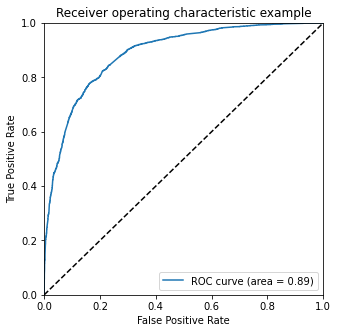

In [82]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The Area under ROC curve 0.89, which consider to be a good value

In [83]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.625456,1,1,1,1,1,1,1,1,0,0,0
1,0,0.121426,0,1,1,0,0,0,0,0,0,0,0
2,0,0.230540,0,1,1,1,0,0,0,0,0,0,0
3,0,0.121426,0,1,1,0,0,0,0,0,0,0,0
4,0,0.476771,0,1,1,1,1,1,0,0,0,0,0


In [84]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.608251,0.979642,0.374069
0.2,0.2,0.761297,0.919381,0.661617
0.3,0.3,0.797512,0.844870,0.767651
0.4,0.4,0.814675,0.775244,0.839538
0.5,0.5,0.816879,0.712134,0.882927
0.6,0.6,0.806960,0.637215,0.913992
0.7,0.7,0.780664,0.525651,0.941463
0.8,0.8,0.760038,0.429967,0.968164
0.9,0.9,0.704456,0.252443,0.989474


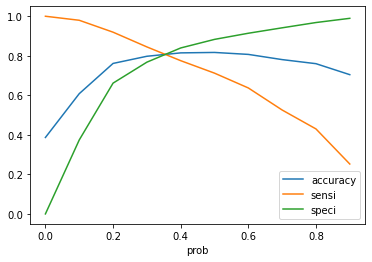

In [85]:
# Plot
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- The optimal cutoff is around 0.35

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.625456,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.121426,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.230540,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.121426,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.476771,0,1,1,1,1,1,0,0,0,0,0,1


In [87]:
confusion1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
confusion1

array([[3439,  456],
       [ 707, 1749]], dtype=int64)

In [88]:
print('Overall Accuracy Score For the Model3 is: ', round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']),2),"%")  

Overall Accuracy Score For the Model3 is:  0.82 %


In [89]:
TP = confusion1[1,1]  #True Positives
TN = confusion1[0,0] #True Negative
FP = confusion1[0,1] #False Positive
FN = confusion1[1,0] #False Negative

In [90]:
print("Sensitivity Score for the Model3 is: ", round(TP/(TP+FN),2),"%")
print("Specificity Score for the Model3 is: ", round(TN/(TN+FP),2),"%")

Sensitivity Score for the Model3 is:  0.71 %
Specificity Score for the Model3 is:  0.88 %


With the current cut off as 0.35 we have accuracy of 82%, sensitivity of 71% and specificity of around 88%.

## Prediction on Test Set

In [91]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [92]:
# Substituting all the columns in the final train model
col = X_train.columns

In [93]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Country_Not Available,Specialization_Not Available,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not Available,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,1,0,0,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,1,0,0,0,0,1,0,0,1,0,0
2085,1.0,0.000000,0.000000,0,1,1,0,0,0,1,1,0,0,0
4048,1.0,0.028369,0.617077,1,0,0,0,0,1,0,0,0,0,0
4790,1.0,0.028369,0.005282,1,0,0,0,0,0,0,0,0,0,0


In [94]:
y_test_pred = res.predict(X_test_sm)                                    # Storing prediction of test set in the variable 'y_test_pred'
y_pred_df = pd.DataFrame(y_test_pred)                              # Coverting it to df
y_test_df = pd.DataFrame(y_test)                                           # Converting y_test to dataframe
y_pred_df.reset_index(drop=True, inplace=True)           # Remove index for both dataframes to append them side by side 
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)           # Append y_test_df and y_pred_df

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})    # Renaming column 
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.434601
1,1,0.814937
2,1,0.981736
3,1,0.871285
4,0,0.099576


In [95]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.434601,1
1,1,0.814937,1
2,1,0.981736,1
3,1,0.871285,1
4,0,0.099576,0


In [96]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion2

array([[1409,  335],
       [ 180,  799]], dtype=int64)

In [97]:
print('Overall Accuracy Score For the Model3 is: ', round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['final_predicted']),2),"%")  

Overall Accuracy Score For the Model3 is:  0.81 %


In [98]:
TP = confusion2[1,1]  #True Positives
TN = confusion2[0,0] #True Negative
FP = confusion2[0,1] #False Positive
FN = confusion2[1,0] #False Negative

In [99]:
print("Sensitivity Score for the Model3 is: ", round(TP/(TP+FN),2),"%")
print("Specificity Score for the Model3 is: ", round(TN/(TN+FP),2),"%")

Sensitivity Score for the Model3 is:  0.82 %
Specificity Score for the Model3 is:  0.81 %


With the current cutoff as 0.35 we have accuracy of 81%, sensitivity of 82% and specificity of around 81%.

## Precision-Recall

In [100]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3439,  456],
       [ 707, 1749]], dtype=int64)

In [101]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7931972789115647

In [102]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7121335504885994

- With the Current cutoff as 0.35  we have Precision arount 79% and Recall around 71%

### Precision and recall tradeoff

In [103]:
from sklearn.metrics import precision_recall_curve

In [104]:
y_train_pred_final['Converted'], y_train_pred_final['Predicted']

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

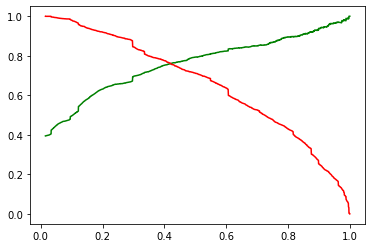

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.625456,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.121426,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.230540,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.121426,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.476771,0,1,1,1,1,1,0,0,0,0,0,1


In [108]:
# Accuracy
print('Overall Accuracy Score is:',round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100,2),'%')

Overall Accuracy Score is: 81.42 %


In [109]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3286,  609],
       [ 571, 1885]], dtype=int64)

In [110]:
TP = confusion2[1,1]# Substituting the value of true positive
TN = confusion2[0,0]# Substituting the value of true negatives
FP = confusion2[0,1] # Substituting the value of false positives
FN = confusion2[1,0]# Substituting the value of false negatives

In [111]:
print('Precision is:',round(TP / (TP + FP),4)*100,"%")
print('Recall is:',round(TP / (TP + FN),4)*100,"%")

Precision is: 75.58 %
Recall is: 76.75 %


- With the current cutoff as 0.41 we have Precision around 76% and Recall around 77%

## Prediction on Test Set

In [112]:
y_test_pred = res.predict(X_test_sm)   # Storing prediction of test set in the variable 'y_test_pred'
y_pred_df = pd.DataFrame(y_test_pred) # Coverting it to df
y_test_df = pd.DataFrame(y_test) # Converting y_test to dataframe

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.434601
1,1,0.814937
2,1,0.981736
3,1,0.871285
4,0,0.099576


In [113]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.434601,1
1,1,0.814937,1
2,1,0.981736,1
3,1,0.871285,1
4,0,0.099576,0


In [114]:
# Check the overall accuracy
print('Overall Accuracy Score is: ', round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)*100,2),'%')

Overall Accuracy Score is:  81.71 %


In [115]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1463,  281],
       [ 217,  762]], dtype=int64)

In [116]:
TP = confusion2[1,1] # Substituting the value of true positive
TN = confusion2[0,0] # Substituting the value of true negatives
FP = confusion2[0,1]  # Substituting the value of false positives
FN = confusion2[1,0] # Substituting the value of false negatives

In [117]:
print('Precision is:',round(TP / (TP + FP),4)*100,"%")
print('Recall is:',round(TP / (TP + FN),4)*100,"%")

Precision is: 73.06 %
Recall is: 77.83 %


- With the current cutoff as 0.41 we have Precision around 73% and Recall around 78%

## Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1. The total time spend on the Website.
2. Total number of visits.
3. When the lead source was:
    <br>a. Google
    <br>b. Direct traffic
    <br>c. Organic search
    <br>d. Welingak website
4. When the last activity was:
    <br>a. SMS
    <br>b. Olark chat conversation
5. When the lead origin is Lead add format.
6. When their current occupation is as a working professional.